In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv('/home/jovyan/HabrAnalysis/Data/output.csv')

In [3]:
data.head()

,Unnamed: 0,nan,nan.1,68k
0,,NaN,NaN,"13,6k"
1,"Свершилось: ценники, которые всегда актуальны,...",NaN,NaN,"11,4k"
2,Яндекс.Маркет — темные паттерны монополии,NaN,NaN,146k
3,Минуточку внимания,NaN,NaN,10k
4,О дивный новый «Мир»! Восстановление советской...,&plus;120,NaN,"1,1k"


In [4]:
import sys
sys.path.append('/home/jovyan/HabrAnalysis/Models')
sys.path.append('/home/jovyan/HabrAnalysis/Analysis')

In [5]:
from Preprocessing import ValuesPreprocessing
from Preprocessing import TextPreprocessing
from Visualisation import Visualisation
from LinearModels import LinearModels
from WordCloudModel import WordCloudModel

/opt/conda/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
vp = ValuesPreprocessing(data)

In [7]:
vp.df.head()

,article_names,raiting,bookmarks,viewers
0,,250.0,429.0,13600.0
1,"Свершилось: ценники, которые всегда актуальны,...",177.0,671.0,11400.0
2,Яндекс.Маркет — темные паттерны монополии,143.0,616.0,146000.0
3,Минуточку внимания,148.0,513.0,10000.0
4,О дивный новый «Мир»! Восстановление советской...,120.0,481.0,1100.0


In [8]:
tp = TextPreprocessing(vp.df)

100%|██████████| 850/850 [00:01<00:00, 773.20it/s] 


In [9]:
habr = tp.df 
habr.head()

,article_names_lemmatize,article_names,raiting,bookmarks,viewers
0,[ \n],,250.0,429.0,13600.0
1,"[свершаться, , ценник, , который, , актуаль...",свершилось ценники которые актуальны пилот 79 ...,177.0,671.0,11400.0
2,"[яндексмаркет, , темный, , паттерный, , мо...",яндексмаркет темные паттерны монополии,143.0,616.0,146000.0
3,"[минуточка, , внимание, \n]",минуточку внимания,148.0,513.0,10000.0
4,"[дивный, , новый, , мир, , восстановление, ...",дивный новый мир восстановление советской ради...,120.0,481.0,1100.0


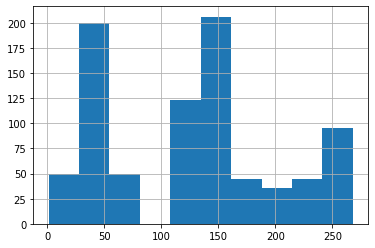

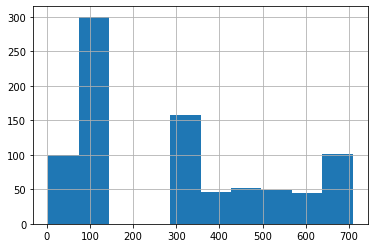

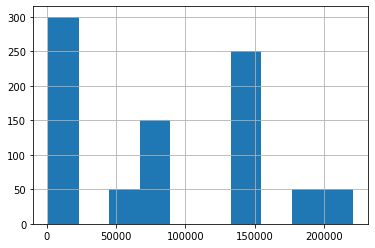

In [10]:
vis = Visualisation(habr)
vis.visualise_hist_all_columns()

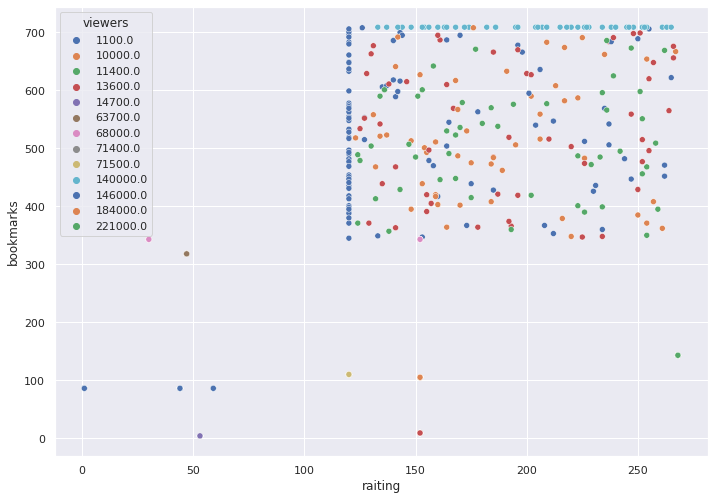

In [11]:
vis.plot_scatter('raiting', 'bookmarks', 'viewers')

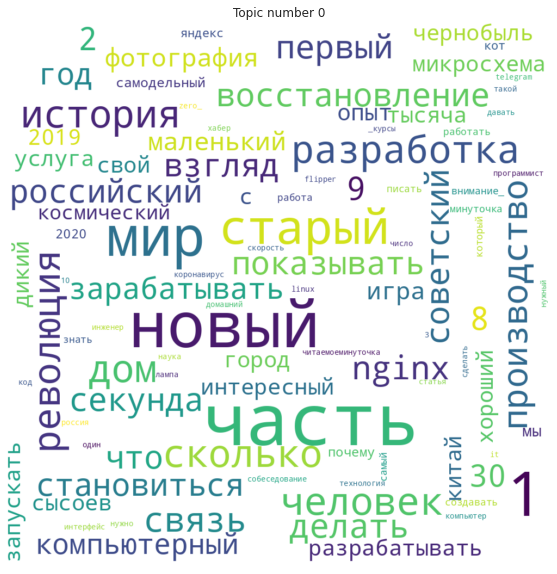

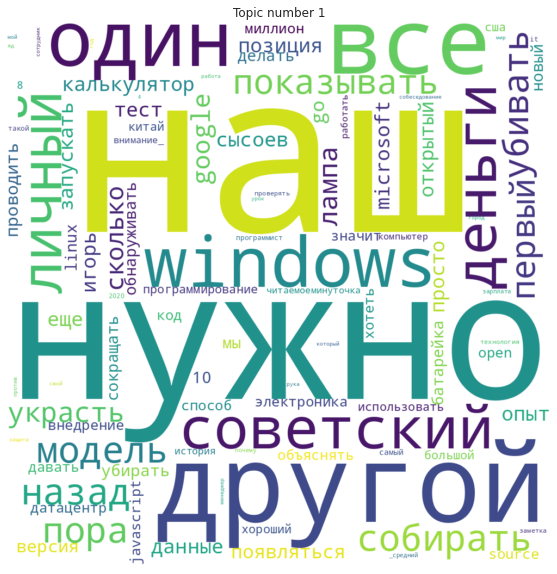

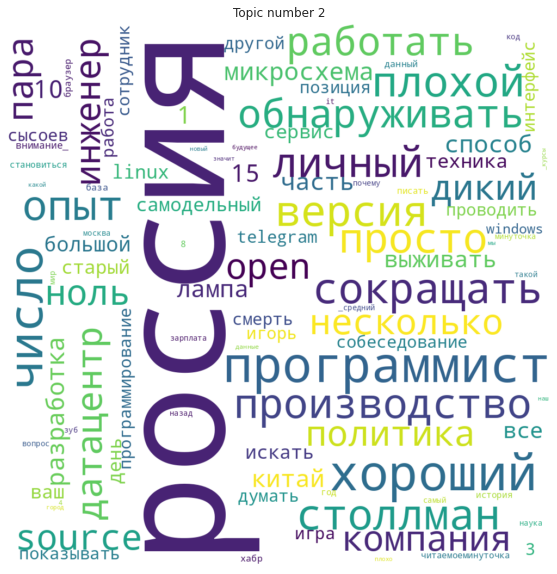

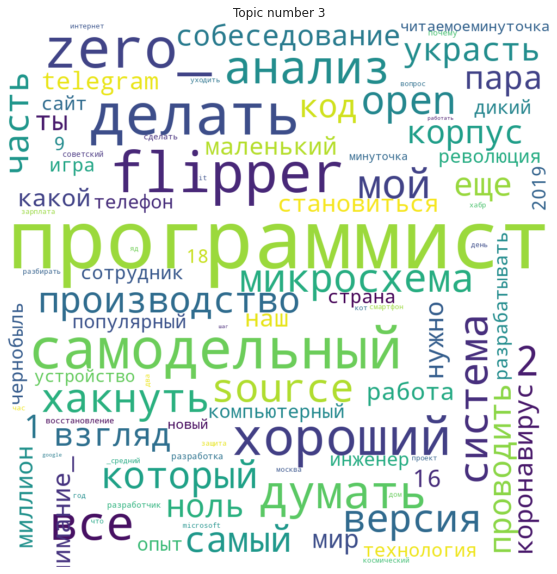

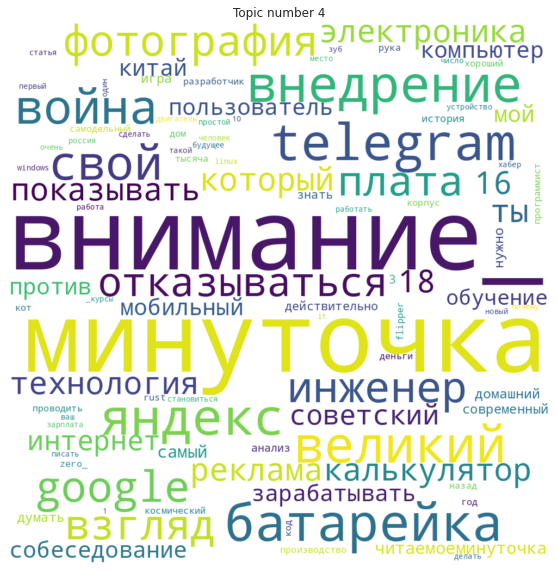

In [12]:
WordCloudModel(habr).plot_it()

In [13]:
model = LinearModels(habr, 'viewers')

0.9042016806722689
0.2823529411764706
              precision    recall  f1-score   support

           0       0.62      0.30      0.40       154
           1       0.04      0.11      0.06         9
           2       0.21      0.45      0.29        31
           3       0.15      0.23      0.18        40
           4       0.07      0.10      0.08        21

    accuracy                           0.28       255
   macro avg       0.22      0.24      0.20       255
weighted avg       0.43      0.28      0.32       255



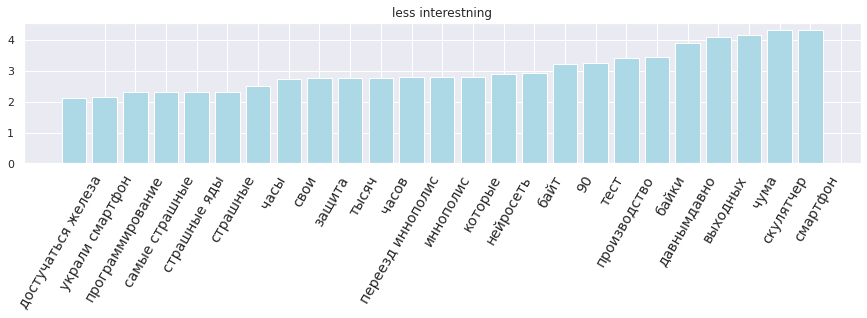

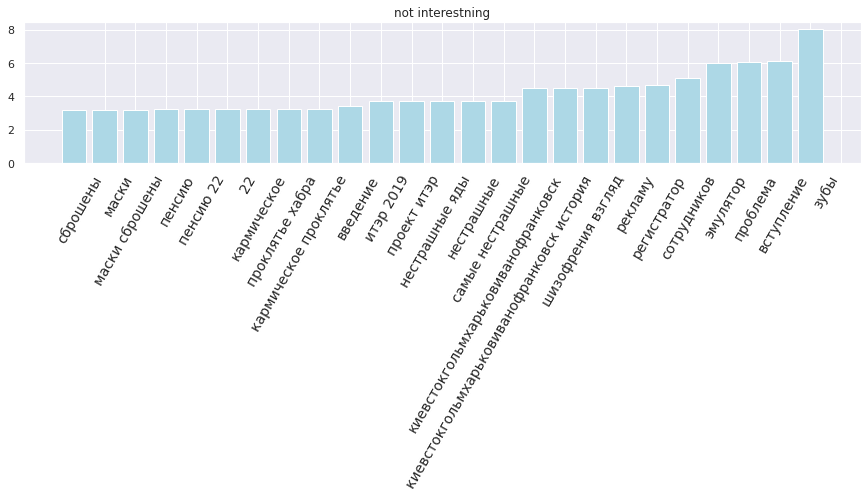

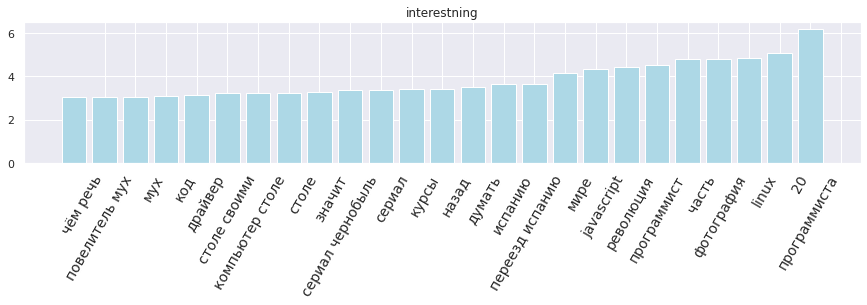

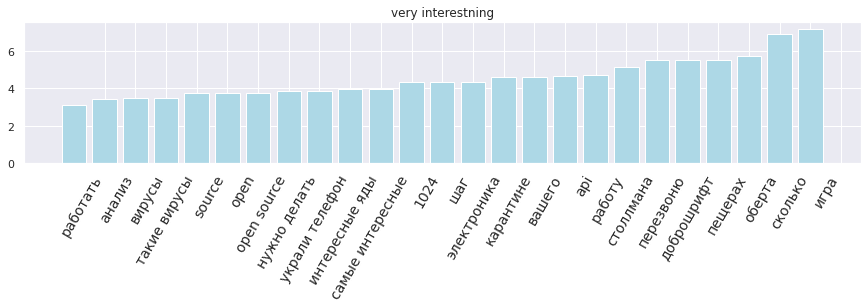

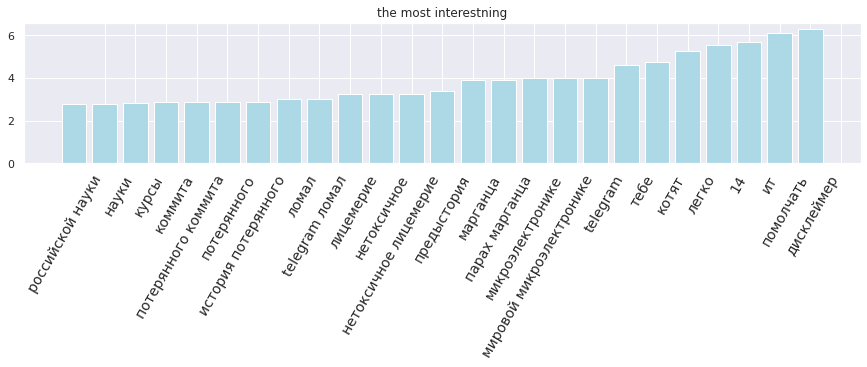

In [14]:
model.visualisation_work_model()

In [15]:
model.get_predict_for_sequence('Возьмите меня на работу, пожалуйста')

Predicted count of viewers between 140000.0 and 146000.0
